<a href="https://colab.research.google.com/github/nyla111/loan-dataset-mining/blob/main/loan-default-prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Loan Default Prediction - Machine Learning Classification Project**

## **Project Overview**
This Jupyter notebook implements a comprehensive machine learning pipeline for predicting loan default risk using various classification algorithms. Developed as part of a data mining assessment, the system evaluates and compares multiple models to identify the best-performing approach for binary classification of loan default status.

## **Objective**
Build and optimize multiple machine learning classifiers to predict whether a borrower will default on a loan (1) or not (0), using historical loan data with 48,962 training samples and 18 features.

## **Dataset Description**
- *Training Data:* 48,962 samples × 19 features (including target)
- *Testing Data:* 20,984 samples × 18 features (without target)
- *Target Variable:* `loan_default` (0 = No Default, 1 = Default)
- *Imbalance:* Approximately 78% non-default vs 22% default

## **Technical Stack**

### Libraries Used
- *Data Manipulation:* `pandas`, `numpy`
- *Visualization:* `matplotlib`, `seaborn`
- *Machine Learning:* `scikit-learn` (Decision Trees, KNN, Random Forest, SVM, Neural Networks)
- *Imbalance Handling:* `imbalanced-learn`

### Classification Algorithms Implemented
1. *Decision Tree Classifier*
2. *K-Nearest Neighbors (KNN)*
3. *Random Forest Classifier*
4. *Support Vector Machine (SVM)*
5. *Multi-layer Perceptron (Neural Network)*

## **Project Workflow**

### 1. Data Loading & Initial Exploration
- Load training and testing datasets
- Analyze target variable distribution
- Identify missing values and data types
- Basic statistical summaries

### 2. Data Preprocessing
- Missing value analysis and handling
- Feature correlation analysis using Spearman correlation
- Feature selection and engineering
- Data scaling and normalization
- Handling categorical variables

### 3. Model Development
- Implementation of 5 classification algorithms
- Hyperparameter tuning and optimization
- Cross-validation for robust evaluation
- Imbalanced data handling techniques
- Model comparison and selection

### 4. Model Evaluation
- Metrics Used: Accuracy, F1-score, Precision, Recall, ROC-AUC
- Confusion matrix analysis
- Cross-validation scores
- ROC curve visualization
- Performance comparison across models

### 5. Prediction & Submission
- Generate predictions on test dataset
- Format results for Kaggle competition submission
- Create submission-ready CSV file
- Export final predictions

## **Key Features**

### Technical Implementation
- *Comprehensive EDA*: Detailed exploratory data analysis with visualizations
- *Multiple Model Comparison*: Systematic evaluation of 5+ classification algorithms
- *Robust Validation*: k-fold cross-validation and train-test splitting
- *Feature Engineering*: Correlation analysis and feature importance
- *Imbalance Handling*: Balanced Random Forest for skewed target distribution

### Professional Practices
- Modular code structure with clear sections
- Detailed comments and documentation
- Reproducible results with fixed random seeds
- Production-ready preprocessing pipeline
- Kaggle competition submission formatting

## **Performance Metrics**
The notebook evaluates models using multiple metrics to ensure comprehensive assessment:
- *Binary Classification Metrics*: Accuracy, Precision, Recall, F1-score
- *Probability-based Metrics*: ROC-AUC score
- *Visual Diagnostics*: ROC curves, confusion matrices
- *Cross-validation*: Mean and standard deviation of scores

## **Environment Setup**
```bash
# Required libraries
pip install pandas numpy matplotlib seaborn scikit-learn imbalanced-learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, f1_score, classification_report,
                             confusion_matrix, roc_curve, roc_auc_score,
                             precision_score, recall_score)
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import VarianceThreshold
from imblearn.ensemble import BalancedRandomForestClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1. Data Loading

Loading the training dataset (with loan_default labels) and unknown dataset (for Kaggle submission).

In [ ]:
loan_data = pd.read_csv('/content/drive/MyDrive/VINUNI/UTS/Intro2Data/Assignment3-Loan-Dataset.csv')
unknown_data = pd.read_csv('/content/drive/MyDrive/VINUNI/UTS/Intro2Data/Assignment3-Unknown-Dataset.csv')

print(f"Training data shape: {loan_data.shape}")
print(f"Testing data shape: {unknown_data.shape}")

# Check target variable distribution
print("\nTarget Variable Distribution:")
print(loan_data['loan_default'].value_counts())
print(loan_data['loan_default'].value_counts(normalize=True))

# Basic data info
print("\nMissing Values:")
missing = loan_data.isnull().sum()
print(missing[missing > 0])

Training data shape: (48962, 19)
Testing data shape: (20984, 18)

Target Variable Distribution:
loan_default
0    38259
1    10703
Name: count, dtype: int64
loan_default
0    0.781402
1    0.218598
Name: proportion, dtype: float64

Missing Values:
Employment.Type    1604
dtype: int64


In [ ]:
sample_submission = pd.read_csv('/content/drive/MyDrive/VINUNI/UTS/Intro2Data/Assignment3-Kaggle-Submission-Sample.csv')
print(sample_submission.head())
print(sample_submission.columns)

  row ID  Prediction-Loan-Default
0   Row0                        0
1   Row1                        1
2   Row2                        0
3   Row3                        1
4   Row4                        1
Index(['row ID', 'Prediction-Loan-Default'], dtype='object')


# 2. Data Exploration

## Missing Values Analysis

In [ ]:
# Calculate missing values percentage
missing_df = pd.DataFrame({
    'Attribute': loan_data.columns,
    'Missing_Count': loan_data.isnull().sum(),
    'Missing_Percentage': (loan_data.isnull().sum() / len(loan_data)) * 100
})

# Sort by missing percentage
missing_df = missing_df.sort_values('Missing_Percentage', ascending=False)
missing_df = missing_df[missing_df['Missing_Percentage'] > 0]

print("\nTable: Attributes with Missing Data")
print(missing_df.to_string(index=False))


Table: Attributes with Missing Data
      Attribute  Missing_Count  Missing_Percentage
Employment.Type           1604             3.27601


## Correlation Analysis

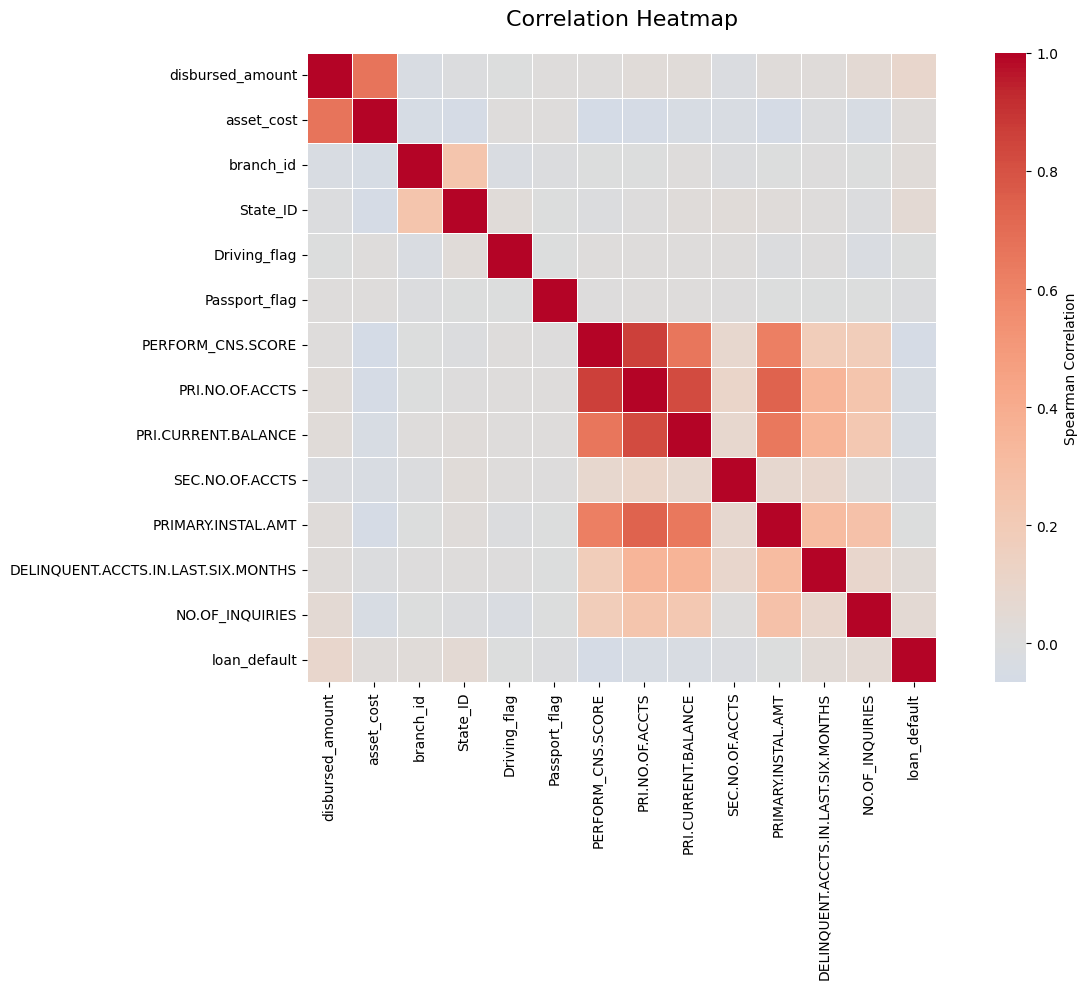

In [ ]:
# Select only numeric columns for correlation
numeric_cols = loan_data.select_dtypes(include=[np.number]).columns.tolist()

# Calculate Spearman correlation
correlation_matrix = loan_data[numeric_cols].corr(method='spearman')

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix,
            cmap='coolwarm',
            center=0,
            annot=False,
            fmt='.2f',
            square=True,
            linewidths=0.5,
            cbar_kws={'label': 'Spearman Correlation'})
plt.title('Correlation Heatmap', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

In [ ]:
# Find highly correlated features with target
if 'loan_default' in correlation_matrix.columns:
    target_corr = correlation_matrix['loan_default'].sort_values(ascending=False)
    print("\nTop 10 Features Correlated with Target (loan_default):")
    print(target_corr.head(10))
    print("\nBottom 10 Features (Negative Correlation):")
    print(target_corr.tail(10))


Top 10 Features Correlated with Target (loan_default):
loan_default                           1.000000
disbursed_amount                       0.094916
State_ID                               0.052679
NO.OF_INQUIRIES                        0.047431
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS    0.035400
branch_id                              0.029468
asset_cost                             0.019525
Driving_flag                          -0.004272
PRIMARY.INSTAL.AMT                    -0.007101
Passport_flag                         -0.011021
Name: loan_default, dtype: float64

Bottom 10 Features (Negative Correlation):
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS    0.035400
branch_id                              0.029468
asset_cost                             0.019525
Driving_flag                          -0.004272
PRIMARY.INSTAL.AMT                    -0.007101
Passport_flag                         -0.011021
SEC.NO.OF.ACCTS                       -0.015704
PRI.CURRENT.BALANCE                   -0.028001
P

## Class Distribution Analysis

In [ ]:
# Count and percentage
class_counts = loan_data['loan_default'].value_counts()
class_percentages = loan_data['loan_default'].value_counts(normalize=True) * 100

print("\nClass Distribution:")
print(f"Class 0 (No Default): {class_counts[0]} ({class_percentages[0]:.2f}%)")
print(f"Class 1 (Default): {class_counts[1]} ({class_percentages[1]:.2f}%)")
print(f"\nImbalance Ratio: {class_counts[0]/class_counts[1]:.2f}:1")


Class Distribution:
Class 0 (No Default): 38259 (78.14%)
Class 1 (Default): 10703 (21.86%)

Imbalance Ratio: 3.57:1


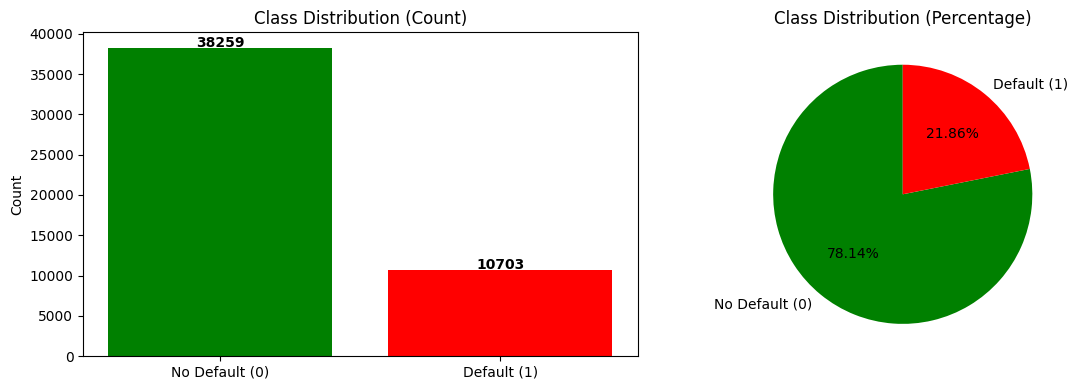

In [ ]:
# Visualize class distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Bar plot
axes[0].bar(['No Default (0)', 'Default (1)'], class_counts.values, color=['green', 'red'])
axes[0].set_ylabel('Count')
axes[0].set_title('Class Distribution (Count)')
for i, v in enumerate(class_counts.values):
    axes[0].text(i, v + 100, str(v), ha='center', fontweight='bold')

# Pie chart
axes[1].pie(class_counts.values,
            labels=['No Default (0)', 'Default (1)'],
            autopct='%1.2f%%',
            colors=['green', 'red'],
            startangle=90)
axes[1].set_title('Class Distribution (Percentage)')

plt.tight_layout()
plt.show()

# 2. Data Preprocessing

In [ ]:
train_data = loan_data.copy()
test_data = unknown_data.copy()

In [ ]:
# Convert CREDIT.HISTORY.LENGTH (Xyrs Ymon) to total months
def convert_to_months(time_str):
    try:
        if pd.isna(time_str) or time_str == 'nan':
            return 0
        years = 0
        months = 0
        if 'yrs' in str(time_str):
            years = int(str(time_str).split('yrs')[0].strip())
        if 'mon' in str(time_str):
            months_part = str(time_str).split('yrs')[1] if 'yrs' in str(time_str) else str(time_str)
            months = int(months_part.split('mon')[0].strip())
        return years * 12 + months
    except:
        return 0

train_data['CREDIT.HISTORY.LENGTH_months'] = train_data['CREDIT.HISTORY.LENGTH'].apply(convert_to_months)
test_data['CREDIT.HISTORY.LENGTH_months'] = test_data['CREDIT.HISTORY.LENGTH'].apply(convert_to_months)

train_data = train_data.drop('CREDIT.HISTORY.LENGTH', axis=1)
test_data = test_data.drop('CREDIT.HISTORY.LENGTH', axis=1)

In [ ]:
# Convert Age from object to numeric
train_data['Age'] = pd.to_numeric(train_data['Age'], errors='coerce')
test_data['Age'] = pd.to_numeric(test_data['Age'], errors='coerce')

# Handle missing values
age_median = train_data['Age'].median()
train_data['Age'] = train_data['Age'].fillna(age_median)

age_median = test_data['Age'].median()
test_data['Age'] = test_data['Age'].fillna(age_median)

In [ ]:
# Convert DisbursalDate to datetime features
train_data['DisbursalDate'] = pd.to_datetime(train_data['DisbursalDate'])
test_data['DisbursalDate'] = pd.to_datetime(test_data['DisbursalDate'])

train_data['DisbursalYear'] = train_data['DisbursalDate'].dt.year
train_data['DisbursalMonth'] = train_data['DisbursalDate'].dt.month
train_data['DisbursalDay'] = train_data['DisbursalDate'].dt.day

test_data['DisbursalYear'] = test_data['DisbursalDate'].dt.year
test_data['DisbursalMonth'] = test_data['DisbursalDate'].dt.month
test_data['DisbursalDay'] = test_data['DisbursalDate'].dt.day

train_data = train_data.drop('DisbursalDate', axis=1)
test_data = test_data.drop('DisbursalDate', axis=1)

In [ ]:
# Handle marital status with one-hot encoding (married, single, divorced)
train_data = pd.get_dummies(train_data, columns=['marital status'], drop_first=True, dtype = int)
train_data = train_data.rename(columns={
    'marital status_Single': 'Is_Single',
    'marital status_Married': 'Is_Married'
})

test_data = pd.get_dummies(test_data, columns=['marital status'], drop_first=True, dtype = int)
test_data = test_data.rename(columns={
    'marital status_Single': 'Is_Single',
    'marital status_Married': 'Is_Married'
})

In [ ]:
# Handle Employment.Type with one-hot encoding (salaried, self-employed, N/A)

train_data['Employment.Type'] = train_data['Employment.Type'].fillna('Self employed') # handle missing values
test_data['Employment.Type'] = test_data['Employment.Type'].fillna('Self employed')

train_data = pd.get_dummies(train_data, columns=['Employment.Type'], drop_first=True, dtype = int)
train_data = train_data.rename(columns={'Employment.Type_Self employed': 'Self_Employed'})

test_data = pd.get_dummies(test_data, columns=['Employment.Type'], drop_first=True, dtype = int)
test_data = test_data.rename(columns={'Employment.Type_Self employed': 'Self_Employed'})

print(train_data.head())
print(test_data.head())

   disbursed_amount  asset_cost  branch_id  State_ID  Driving_flag  \
0             53278       61360         67         6             0   
1             46349       61500         67         6             0   
2             64769       74190         67         6             0   
3             47549       61400         67         6             0   
4             43594       78256         67         6             0   

   Passport_flag  PERFORM_CNS.SCORE  PRI.NO.OF.ACCTS  PRI.CURRENT.BALANCE  \
0              0                  0                0                    0   
1              0                  0                0                    0   
2              0                786                3                  676   
3              0                 17                1                    0   
4              0                  0                0                    0   

   SEC.NO.OF.ACCTS  ...  NO.OF_INQUIRIES  loan_default   Age  \
0                0  ...                0            

# Feature Engineering

In [ ]:
def create_features(df):
    """Create engineered features for the dataset"""
    df_fe = df.copy()

    # Financial Ratio Features
    df_fe['loan_to_value_ratio'] = df_fe['disbursed_amount'] / (df_fe['asset_cost'] + 1e-8)
    df_fe['loan_to_value_ratio'] = df_fe['loan_to_value_ratio'].clip(upper=2.0)

    df_fe['debt_burden_ratio'] = df_fe['PRIMARY.INSTAL.AMT'] / (df_fe['disbursed_amount'] / 12 + 1e-8)
    df_fe['debt_burden_ratio'] = df_fe['debt_burden_ratio'].clip(upper=1.0)

    df_fe['asset_coverage_ratio'] = df_fe['asset_cost'] / (df_fe['disbursed_amount'] + 1e-8)

    # Credit Behavior Features
    df_fe['total_accounts'] = df_fe['PRI.NO.OF.ACCTS'] + df_fe['SEC.NO.OF.ACCTS']
    df_fe['avg_primary_balance'] = df_fe['PRI.CURRENT.BALANCE'] / (df_fe['PRI.NO.OF.ACCTS'] + 1e-8)
    df_fe['score_to_balance_ratio'] = df_fe['PERFORM_CNS.SCORE'] / (df_fe['PRI.CURRENT.BALANCE'] + 1e-8)

    # Interaction Features
    df_fe['age_credit_interaction'] = df_fe['Age'] * (df_fe['CREDIT.HISTORY.LENGTH_months'] / 12)
    df_fe['score_inquiry_interaction'] = df_fe['PERFORM_CNS.SCORE'] * df_fe['NO.OF_INQUIRIES']
    df_fe['self_employed_loan_interaction'] = df_fe['Self_Employed'] * df_fe['disbursed_amount']
    df_fe['married_age_interaction'] = df_fe['Is_Married'] * df_fe['Age']

    # Binning Features
    df_fe['age_group'] = pd.cut(df_fe['Age'],
                                bins=[0, 25, 35, 45, 55, 100],
                                labels=['18-25', '26-35', '36-45', '46-55', '55+'])

    df_fe['loan_amount_group'] = pd.cut(df_fe['disbursed_amount'],
                                        bins=[0, 30000, 60000, 90000, 120000, float('inf')],
                                        labels=['Very_Small', 'Small', 'Medium', 'Large', 'Very_Large'])

    df_fe['credit_score_group'] = pd.cut(df_fe['PERFORM_CNS.SCORE'],
                                         bins=[-1, 0, 300, 600, 750, 900, 1000],
                                         labels=['No_History', 'Very_Poor', 'Poor', 'Fair', 'Good', 'Excellent'])

    df_fe['credit_history_years'] = df_fe['CREDIT.HISTORY.LENGTH_months'] / 12
    df_fe['credit_history_group'] = pd.cut(df_fe['credit_history_years'],
                                           bins=[0, 2, 5, 10, 20, 50],
                                           labels=['New', 'Short', 'Medium', 'Long', 'Very_Long'])

    # Risk Indicator Features
    df_fe['high_ltv'] = (df_fe['loan_to_value_ratio'] > 0.8).astype(int)
    df_fe['high_debt_burden'] = (df_fe['debt_burden_ratio'] > 0.4).astype(int)
    df_fe['multiple_delinquencies'] = (df_fe['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'] > 1).astype(int)
    df_fe['high_inquiries'] = (df_fe['NO.OF_INQUIRIES'] > 3).astype(int)
    df_fe['young_age'] = (df_fe['Age'] < 25).astype(int)
    df_fe['short_credit_history'] = (df_fe['CREDIT.HISTORY.LENGTH_months'] < 24).astype(int)
    df_fe['no_credit_history'] = (df_fe['PERFORM_CNS.SCORE'] == 0).astype(int)
    df_fe['zero_balance'] = (df_fe['PRI.CURRENT.BALANCE'] == 0).astype(int)

    # Composite risk score
    risk_factors = ['high_ltv', 'high_debt_burden', 'multiple_delinquencies', 'high_inquiries',
                    'young_age', 'short_credit_history', 'no_credit_history', 'zero_balance']
    df_fe['risk_score'] = df_fe[risk_factors].sum(axis=1)

    # Aggregation Features
    df_fe['total_credit_activities'] = (df_fe['PRI.NO.OF.ACCTS'] +
                                        df_fe['SEC.NO.OF.ACCTS'] +
                                        df_fe['NO.OF_INQUIRIES'])

    df_fe['financial_capacity_score'] = (df_fe['asset_cost'] +
                                         df_fe['PRI.CURRENT.BALANCE']) / (df_fe['disbursed_amount'] + 1e-8)

    # Encode categorical columns
    categorical_cols = ['age_group', 'loan_amount_group', 'credit_score_group', 'credit_history_group']
    for col in categorical_cols:
        if col in df_fe.columns:
            df_fe = pd.get_dummies(df_fe, columns=[col], drop_first=True, dtype=int, prefix=col)

    # Log transformations for skewed features
    skewed_features = ['disbursed_amount', 'asset_cost', 'PRI.CURRENT.BALANCE', 'PRIMARY.INSTAL.AMT']
    for feature in skewed_features:
        if feature in df_fe.columns:
            df_fe[f'{feature}_log'] = np.log1p(np.abs(df_fe[feature]))

    # Square transformations for important features
    important_features = ['PERFORM_CNS.SCORE', 'Age', 'CREDIT.HISTORY.LENGTH_months']
    for feature in important_features:
        if feature in df_fe.columns:
            df_fe[f'{feature}_squared'] = df_fe[feature] ** 2

    # Clean and finalize
    df_fe = df_fe.replace([np.inf, -np.inf], np.nan)
    df_fe = df_fe.fillna(0)

    return df_fe

In [ ]:
# Apply feature engineering
train_data_fe = create_features(train_data)
test_data_fe = create_features(test_data)

print(f"After feature engineering:")
print(f"Loan data shape: {train_data_fe.shape}")
print(f"Unknown data shape: {test_data_fe.shape}")

After feature engineering:
Loan data shape: (48962, 68)
Unknown data shape: (20984, 67)


In [ ]:
# Remove low variance features
X_temp = train_data_fe.drop('loan_default', axis=1)
y_temp = train_data_fe['loan_default']

selector = VarianceThreshold(threshold=0.01)
X_temp_selected = selector.fit_transform(X_temp)
selected_features = X_temp.columns[selector.get_support()]

train_data_fe = train_data_fe[['loan_default'] + list(selected_features)]
test_data_fe = test_data_fe[list(selected_features)]

print(f"After variance filtering: {train_data_fe.shape}")

After variance filtering: (48962, 61)


# Data Partitioning and Scaling

In [ ]:
# Split features and target
X = train_data_fe.drop('loan_default', axis=1)
y = train_data_fe['loan_default']

# Train-validation split (70-30)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape}")
print(f"Validation set: {X_val.shape}")
print(f"\nClass distribution in training:")
print(y_train.value_counts())
print(y_train.value_counts(normalize=True))

Training set: (34273, 60)
Validation set: (14689, 60)

Class distribution in training:
loan_default
0    26781
1     7492
Name: count, dtype: int64
loan_default
0    0.781402
1    0.218598
Name: proportion, dtype: float64


In [ ]:
# For SVM and Neural Network
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)